In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")
import wordnet
import scipy
import spacy

In [2]:
twt_data = pd.read_csv("Elon_musk.csv", encoding= 'cp1252', error_bad_lines=False)

In [3]:
twt_data.shape

(1999, 2)

In [4]:
twt_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ Ray tracing on Cyberpunk with HDR is next-le...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
twt_data.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
twt_data.head()

,Text
0,@kunalb11 I’m an alien
1,@ Ray tracing on Cyberpunk with HDR is next-le...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


## English Stopwords

In [11]:
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocessing the Tweet Text

In [12]:
import re
import string

In [13]:
def pre_process(twt):
    ## convert all twt in lower case
    twt = twt.lower()
    ## remove any type of url
    twt = re.sub(r"http\S+|www\S+|https\S+", "", twt, flags=re.MULTILINE)
    
    ## remove the punctuations
    twt = twt.translate(str.maketrans("", "", string.punctuation))
    
    ## remove user @ refrences and n'#' for the tweets
    twt = re.sub(r"\@\w+|\#", "", twt)
    
    ## remove stopwords
    twt_tokkens = word_tokenize(twt)
    filter_word = [word for word in twt_tokkens if word not in stop_words]
    
    ## do stemming
    ps = PorterStemmer()
    stemmed_word = [ps.stem(w) for w in filter_word] 
    
    ## do lemmentizer
    lemmatizer = WordNetLemmatizer()
    lemma_word = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_word]
    
    return " ".join(lemma_word)
#pre_process("Hi there, how are you preparing for your exam?")

In [14]:
pre_process("Hi there, how are you preparing for your exam?")

'hi prepar exam'

In [15]:
Clean_text = [lambda x: pre_process(x)]

In [16]:
twt_data['Clean_Text'] = pd.DataFrame(twt_data.Text.apply(Clean_text))

In [17]:
twt_data.head(10)

,Text,Clean_Text
0,@kunalb11 I’m an alien,kunalb11 ’ alien
1,@ Ray tracing on Cyberpunk with HDR is next-le...,ray trace cyberpunk hdr nextlevel tri
2,@joerogan @Spotify Great interview!,joerogan spotifi great interview
3,@gtera27 Doge is underestimated,gtera27 doge underestim
4,@teslacn Congratulations Tesla China for amazi...,teslacn congratul tesla china amaz execut last...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,happi new year ox
6,"Frodo was the underdoge,\nAll thought he would...",frodo underdog thought would fail
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),owenspark flcnhvi anonyx10 haha thank
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvi anonyx10 inde tweet definit repres rea...
9,The most entertaining outcome is the most likely,entertain outcom like


In [18]:
twt_data.drop('Text',axis=1, inplace=True)

## Capturing the subjectivity & polarity of each tweet

In [19]:
from textblob import TextBlob

In [20]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['Clean_Text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [21]:
twt_data[['Subjectivity', 'Polarity']] = twt_data.apply(sentiment_analysis, axis=1)

In [22]:
twt_data

,Clean_Text,Subjectivity,Polarity
0,kunalb11 ’ alien,0.750000,-0.250000
1,ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000
2,joerogan spotifi great interview,0.750000,0.800000
3,gtera27 doge underestim,0.000000,0.000000
4,teslacn congratul tesla china amaz execut last...,0.033333,0.000000
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.443333,0.186667
1995,ppathol make sure read ur term amp condit clic...,0.888889,0.500000
1996,teslagong ppathol samwis gamge,0.000000,0.000000
1997,ppathol altho dumb dumb u0001f525u0001f525,0.500000,-0.375000


## Creating wordCloud

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
all_words = " ".join([twts for twts in twt_data["Clean_Text"]])

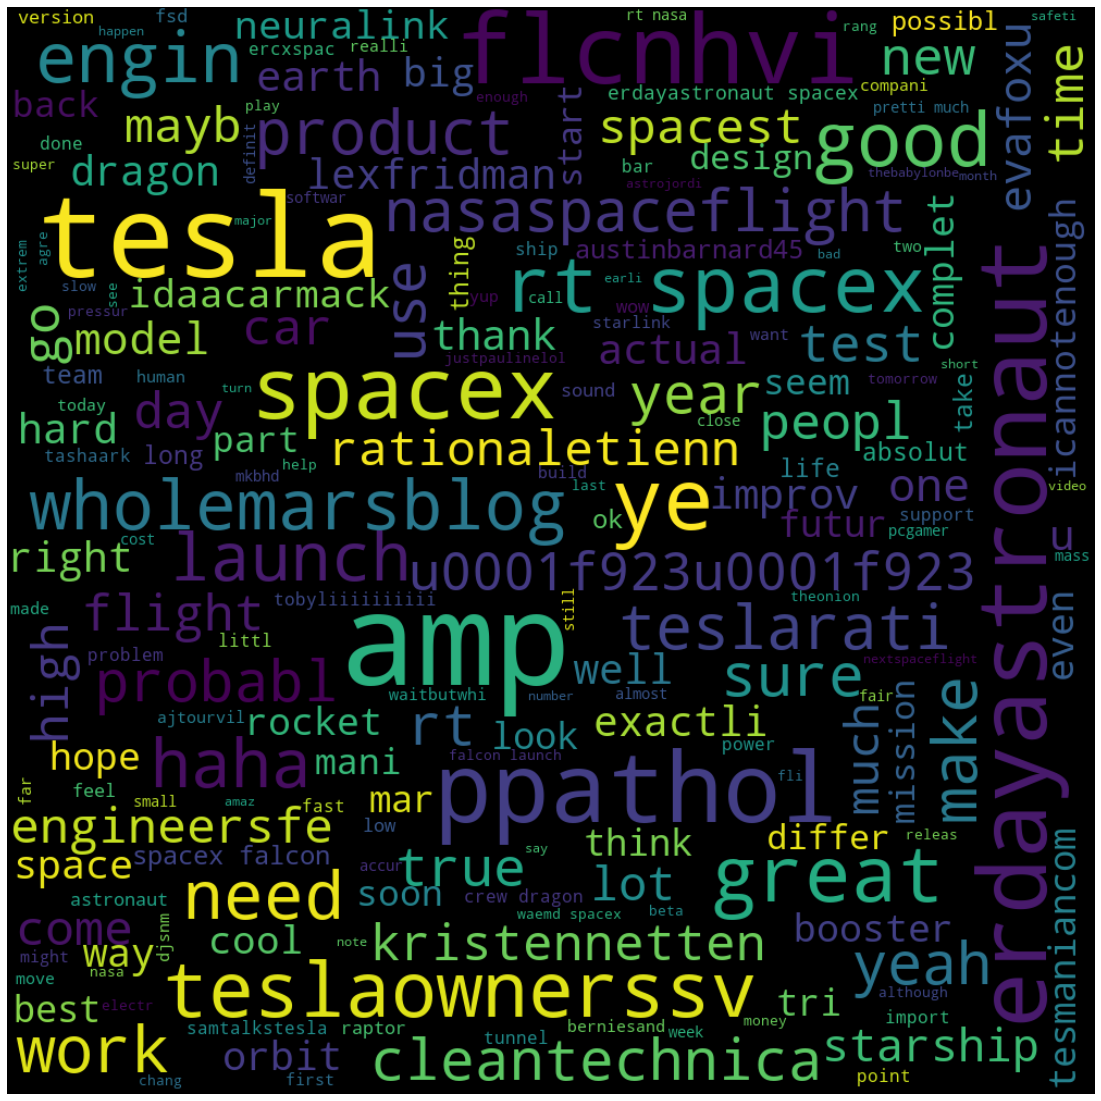

In [25]:
word_cloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=119).generate(all_words)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation="Bilinear")
plt.axis("off")
plt.show()

## Cataloging of the polarity of the tweets

In [26]:
def analysis(score):
    if score < 0:
        return 'Negative'
    
    elif score ==0:
        return 'Netural'
    
    else:
        return 'Positive'

In [27]:
twt_data["Analysis"] = twt_data.Polarity.apply(analysis)

In [28]:
twt_data

,Clean_Text,Subjectivity,Polarity,Analysis
0,kunalb11 ’ alien,0.750000,-0.250000,Negative
1,ray trace cyberpunk hdr nextlevel tri,0.000000,0.000000,Netural
2,joerogan spotifi great interview,0.750000,0.800000,Positive
3,gtera27 doge underestim,0.000000,0.000000,Netural
4,teslacn congratul tesla china amaz execut last...,0.033333,0.000000,Netural
...,...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.443333,0.186667,Positive
1995,ppathol make sure read ur term amp condit clic...,0.888889,0.500000,Positive
1996,teslagong ppathol samwis gamge,0.000000,0.000000,Netural
1997,ppathol altho dumb dumb u0001f525u0001f525,0.500000,-0.375000,Negative


In [29]:
twt_data.Analysis.value_counts()

Netural     1167
Positive     657
Negative     175
Name: Analysis, dtype: int64

In [30]:
positive_tweets = twt_data[twt_data['Analysis']== 'Positive']
negative_tweets = twt_data[twt_data['Analysis']== 'Negative']

In [31]:
positive_df = pd.DataFrame(positive_tweets)
positive_df.Clean_Text[:5]

2                  joerogan spotifi great interview
5                                 happi new year ox
7             owenspark flcnhvi anonyx10 haha thank
13             geoffkeighley unrealengin ’ get real
15    joshmanmod definit issu sentenc seem bit high
Name: Clean_Text, dtype: object

In [32]:
negative_df = pd.DataFrame(negative_tweets)
negative_df.Clean_Text[:5]

#print('positive tweets')
#for i, row in positive_tweets[:5].iterrows():
 #   print(' -' + row['tweet']

0                                      kunalb11 ’ alien
6                     frodo underdog thought would fail
25    rationaletienn adamklotz starlink staggeringli...
84                             becom meme destroy short
87                                     madoverlord dumb
Name: Clean_Text, dtype: object

## Is Elon generally positive or negative?

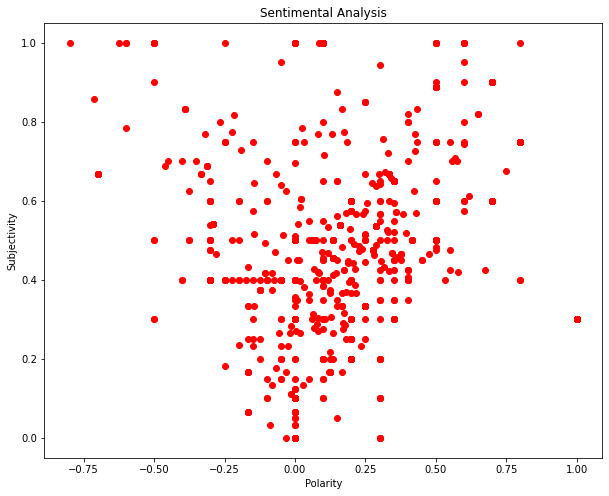

In [33]:
plt.figure(figsize=(10,8))

for i in range(0, twt_data.shape[0]):
    plt.scatter(twt_data.Polarity[i], twt_data.Subjectivity[i], color='Red')

plt.title("Sentimental Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()